## **Neural Networks**

**Project - 07**

Objective
- The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network.

## **Importing the necessary libraries**

In [0]:
# Import File

import h5py
import numpy as np

# TensorFlow version 2.x
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__


# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## **Mount Google Drive As data is Stored in Drive**

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


**Verify File Location**

In [3]:
!ls '/gdrive/My Drive/Greatlearning_AI-ML/study/07-Project-NeuralNetworks/'

'Problem Statement -NN Classification..pdf'   SVHN_single_grey1.h5


# **Import Data from Drive**

In [0]:
h5file = h5py.File('/gdrive/My Drive/Greatlearning_AI-ML/study/07-Project-NeuralNetworks/SVHN_single_grey1.h5', 'r')

In [5]:
# Get and print list of datasets within the H5 file
datasetNames = [n for n in h5file.keys()]
for n in datasetNames:
  print(n)

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:
# Load File in Data Set

X_train = h5file['X_train'][:]
y_train = h5file['y_train'][:]
X_test = h5file['X_test'][:]
y_test = h5file['y_test'][:]
X_val = h5file['X_val'][:]
y_val = h5file['y_val'][:]

In [0]:
# Close File after Import
h5file.close()

## **Data Shape**

In [8]:
print('X and Y Train Shape')
print(X_train.shape)
print(y_train.shape)

X and Y Train Shape
(42000, 32, 32)
(42000,)


In [9]:
print('X and Y Test Shape')
print(X_test.shape)
print(y_test.shape)

X and Y Test Shape
(18000, 32, 32)
(18000,)


In [10]:
print('X and Y Validation Shape')
print(X_val.shape)
print(y_val.shape)

X and Y Validation Shape
(60000, 32, 32)
(60000,)


# **Checking Data with Matplotlib**

Label: 7


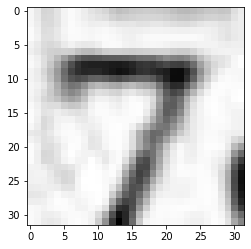

In [11]:
# Checking Data with Cross validation
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

Label: 8


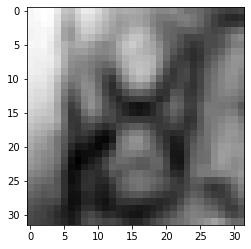

In [12]:
print("Label: {}".format(y_train[11533]))
plt.imshow(X_train[11533], cmap='gray')

#### Create Subset of data

In [0]:
# For further use
X_train_sub = X_train
y_train_sub = y_train
X_test_sub = X_test
y_test_sub = y_test

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [14]:
from tensorflow.keras.utils import to_categorical

print("Value before encoding:", y_train[0])

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One hot encoded value of y_train:", y_train[0])

Value before encoding: 2
Shape of y_train: (42000, 10)
One hot encoded value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Define the model
- The Sequential model is a linear stack of layers.
- The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.
- You can also simply add layers via the .add() method

In [0]:
# Initialize Sequential model
model = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tensorflow.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model.add(tensorflow.keras.layers.BatchNormalization())

### Apply ReLU and Dropout

In [0]:
# Hidden layers
model.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tensorflow.keras.layers.Dense(100, activation='relu', name='Layer_2'))

# Dropout layer
model.add(tensorflow.keras.layers.Dropout(0.5))

# Hidden layers
model.add(tensorflow.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tensorflow.keras.layers.Dense(30, activation='relu', name='Layer_4'))

# Dropout layer
model.add(tensorflow.keras.layers.Dropout(0.3))

In [0]:
#Output layer
model.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))

### Compile the model

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1

### Fit the model
- .fit() trains the model for a fixed number of epochs (iterations on a dataset)
- An epoch is an iteration over the entire x and y data provided
- batch_size is the number of samples per gradient update
- validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch

In [21]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=65, batch_size = 32)

Epoch 1/65
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5722 - accuracy: 0.8331 - val_loss: 0.5113 - val_accuracy: 0.8535
Epoch 2/65
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5634 - accuracy: 0.8346 - val_loss: 0.4962 - val_accuracy: 0.8585
Epoch 3/65
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5696 - accuracy: 0.8314 - val_loss: 0.5264 - val_accuracy: 0.8472
Epoch 4/65
1313/1313 [==============================] - 6s 5ms/step - loss: 0.5608 - accuracy: 0.8369 - val_loss: 0.4779 - val_accuracy: 0.8613
Epoch 5/65
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5588 - accuracy: 0.8366 - val_loss: 0.4919 - val_accuracy: 0.8599
Epoch 6/65
1313/1313 [==============================] - 6s 5ms/step - loss: 0.5600 - accuracy: 0.8351 - val_loss: 0.4949 - val_accuracy: 0.8582
Epoch 7/65
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5550 - accuracy: 0.8370 - val_loss: 0.4980 - val_accuracy:

In [22]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.4970 - accuracy: 0.8593


[0.497007817029953, 0.859333336353302]

## The Model accuracy is **0.85** with Loss of **.049**

#### Reshape features

In [0]:
# Create new Set

X_train = X_train_sub 
y_train = y_train_sub
X_test = X_test_sub
y_test = y_test_sub

In [24]:
print(X_train.shape)
print(X_test.shape)

(42000, 32, 32)
(18000, 32, 32)


In [25]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(42000, 1024)
(18000, 1024)


#### Normalize features

In [26]:
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_train.min())


254.9745
0.0
0.9999
0.0


In [27]:
print(y_train[8000])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
print(y_train[8000])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### Creating Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

In [29]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

42/42 [==============================] - 1s 31ms/step - loss: 2.3544 - accuracy: 0.0981


 - There are 10 output classes and the model is correctly predicting 1 up on 10 times (1/10 = 0.1% approx) as it is untrained.

#### Lambda(Regularization)

In [30]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

42/42 [==============================] - 2s 54ms/step - loss: 3306.3513 - accuracy: 0.0970


- loss went up. Good! (Another sanity check)

#### To Test Overfit we will take small set of data 25 images to ensure model architecture is good

In [0]:
X_train_subset = X_train[0:25]
y_train_subset = y_train[0:25]

In [32]:
X_train = X_train_subset
y_train = y_train_subset
print(X_train.shape)
print(y_train.shape)

(25, 1024)
(25, 10)


In [33]:
lr = 0.001
Lambda = 0
train_and_test_loop(400, lr, Lambda)

Epoch 1/400
1/1 [==============================] - 0s 1ms/step - loss: 2.5250 - accuracy: 0.0800
Epoch 2/400
1/1 [==============================] - 0s 1ms/step - loss: 2.5115 - accuracy: 0.0800
Epoch 3/400
1/1 [==============================] - 0s 1ms/step - loss: 2.4866 - accuracy: 0.0800
Epoch 4/400
1/1 [==============================] - 0s 2ms/step - loss: 2.4528 - accuracy: 0.0800
Epoch 5/400
1/1 [==============================] - 0s 1ms/step - loss: 2.4132 - accuracy: 0.0800
Epoch 6/400
1/1 [==============================] - 0s 1ms/step - loss: 2.3712 - accuracy: 0.0800
Epoch 7/400
1/1 [==============================] - 0s 2ms/step - loss: 2.3288 - accuracy: 0.0800
Epoch 8/400
1/1 [==============================] - 0s 2ms/step - loss: 2.2883 - accuracy: 0.1600
Epoch 9/400
1/1 [==============================] - 0s 2ms/step - loss: 2.2503 - accuracy: 0.2400
Epoch 10/400
1/1 [==============================] - 0s 2ms/step - loss: 2.2167 - accuracy: 0.2000
Epoch 11/400
1/1 [===========

#### Small Set train accuracy going to 100, We are successful in overfitting. The model architecture looks fine. Lets go for fine tuning it.

In [34]:
# Reimport data Set

# Create new Set

X_train = X_train_sub 
y_train = y_train_sub
X_test = X_test_sub
y_test = y_test_sub

print("Reimported Data Set Orignal Shape\n")
print(X_train.shape)
print(X_test.shape)
print("\n\n")


print("Reimported Data Set Reshape \n")
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)
print("\n\n")


print("Reimported Data Min and Max \n")
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_train.min())
print("\n\n")


print("Reimported Data Set Caregorical Data\n")
print(y_train[8000])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
print(y_train[8000])

Reimported Data Set Orignal Shape

(42000, 32, 32)
(18000, 32, 32)



Reimported Data Set Reshape 

(42000, 1024)
(18000, 1024)



Reimported Data Min and Max 

254.9745
0.0
0.9999
0.0



Reimported Data Set Caregorical Data

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### Start with small regularization and find learning rate that makes the loss go down

In [35]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 32ms/step - loss: 2.4127 - accuracy: 0.1005
Epoch 2/20
42/42 [==============================] - 1s 32ms/step - loss: 2.4126 - accuracy: 0.1005
Epoch 3/20
42/42 [==============================] - 1s 32ms/step - loss: 2.4124 - accuracy: 0.1005
Epoch 4/20
42/42 [==============================] - 1s 33ms/step - loss: 2.4122 - accuracy: 0.1005
Epoch 5/20
42/42 [==============================] - 1s 33ms/step - loss: 2.4120 - accuracy: 0.1005
Epoch 6/20
42/42 [==============================] - 1s 33ms/step - loss: 2.4118 - accuracy: 0.1006
Epoch 7/20
42/42 [==============================] - 1s 33ms/step - loss: 2.4117 - accuracy: 0.1006
Epoch 8/20
42/42 [==============================] - 1s 32ms/step - loss: 2.4115 - accuracy: 0.1007
Epoch 9/20
42/42 [==============================] - 1s 32ms/step - loss: 2.4113 - accuracy: 0.1007
Epoch 10/20
42/42 [==============================] - 1s 32ms/step - loss: 2.4111 - accuracy: 0.1008
Epoch 11/

#### The following example Loss is changing bearly and learning rate is also Low

#### Okay now lets try a (larger) learning rate 1e6. What could possibly go wrong?

In [36]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(10, lr, Lambda)

Epoch 1/10
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0998
Epoch 2/10
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997
Epoch 3/10
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997
Epoch 4/10
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997
Epoch 5/10
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997
Epoch 6/10
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997
Epoch 7/10
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997
Epoch 8/10
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997
Epoch 9/10
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997
Epoch 10/10
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997


- Loss exploding. Learning rate is too high. 

In [37]:
# learning rate = 1e4
lr = 1e4
Lambda = 1e-7
train_and_test_loop(5, lr, Lambda)

Epoch 1/5
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0998
Epoch 2/5
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997
Epoch 3/5
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997
Epoch 4/5
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997
Epoch 5/5
42/42 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.0997


#### Run coarse search for 10 times with different lr and Lambda values each with 100 epochs.

In [0]:
# Test Model

def test_loop_model(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

In [0]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = test_loop_model(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 5, best_acc, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 1s 32ms/step - loss: 2.3405 - accuracy: 0.1088
Epoch 2/100
42/42 [==============================] - 1s 33ms/step - loss: 2.3101 - accuracy: 0.1119
Epoch 3/100
42/42 [==============================] - 1s 32ms/step - loss: 2.3053 - accuracy: 0.1152
Epoch 4/100
42/42 [==============================] - 1s 32ms/step - loss: 2.3035 - accuracy: 0.1177
Epoch 5/100
42/42 [==============================] - 1s 32ms/step - loss: 2.3023 - accuracy: 0.1200
Epoch 6/100
42/42 [==============================] - 1s 32ms/step - loss: 2.3013 - accuracy: 0.1217
Epoch 7/100
42/42 [==============================] - 1s 32ms/step - loss: 2.3003 - accuracy: 0.1243
Epoch 8/100
42/42 [==============================] - 1s 32ms/step - loss: 2.2994 - accuracy: 0.1273
Epoch 9/100
42/42 [==============================] - 1s 32ms/step - loss: 2.2986 - accuracy: 0.1288
Epoch 10/100
42/42 [==============================] - 1s 33ms/step - loss: 2.2978 - accuracy: 0.1312

## The Best Approch is to use Lambda 